In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy import stats as stats

print("importações feitas")

importações feitas


In [14]:
# baixando base e vendo o dataframe
X, y = fetch_openml("mnist_784", parser='auto', version=1, return_X_y=True, as_frame=True)
print("dados baixados")


dados baixados


In [15]:
print("Tamanho dos dados: ", X.shape)
print("Tamanho de y:", y.shape, " \t Tipo de y:",type(y),'\n')

    
display(X)

Tamanho dos dados:  (70000, 784)
Tamanho de y: (70000,)  	 Tipo de y: <class 'pandas.core.series.Series'> 



,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
dig = 5
corr_dig = (X[y == str(dig)] + np.random.normal(loc = 0, scale = 0.001, size = X[y == str(dig)].shape)).corr() # Com maracutaia!
corr_dig[0, 0] = -1 # Com maracutaia!



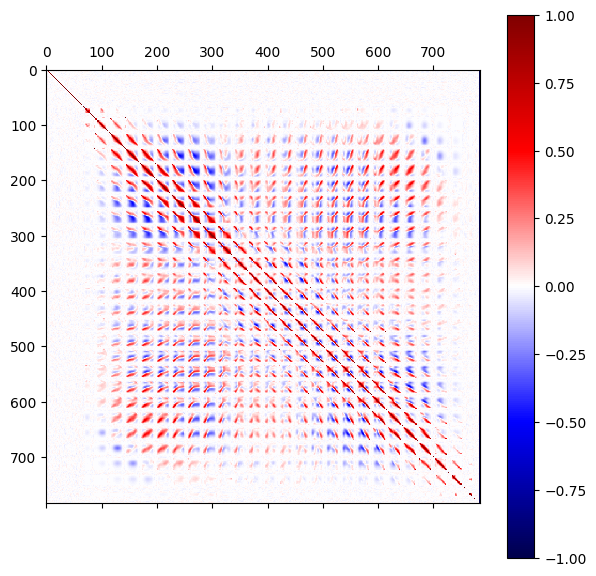

In [17]:
plt.figure(figsize = (7, 7))
plt.matshow(corr_dig, cmap = 'seismic', fignum = 1)
plt.colorbar()
plt.show()
# display(corr_dig)

# Questão 1
*Os classificadores de Bayes ingênuo gaussiano e Bernoulli têm duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos) ou Bernoulli (com parâmetro desconhecido). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.*

*BÔNUS: Apresente uma análise exploratória para justificar as suas conclusões.*


## R:
Primeiramente, temos que considerar cada imagem que temos como um vetor aleatório $\mathbf{X}$, de tamanho $p$, que é o número de pixels. 

Isto é, $\mathbf{X}$ é um vetor em $\mathbf{R}^p$, sendo que temos p = 784 pixels para uma imagem de tamanho (28x28).  
**Os pixels podem ser considerados nossos atributos**, que aqui variam no intervalo de 0 a 255, representando tons de cinza.  
A variável aleatória que representa uma "resposta" será  $\mathbf{Y}$, que assumirá os valores de nossas classificações para as imagens. Isto é, $\mathbf{Y}$ representa classes, que no nosso problema são os dígitos de 0 a 9.

O que queremos determinar é: a probabilidade da imagem/vetor aleatório $x$ que estamos analisando ser o dígito/resposta x.  
Isto é $\mathbb{P}(Y = d | X = x)$, que pelo teorema de Bayes temos $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} \mathbb{P}(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)}$$.  
Onde podemos estimar $\mathbb{P}(Y = d)$ pela amostragem dada, e nos resta determinar.... $\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d)$ !
Determinar isto é a mesma coisa que, para $0 \leq i<784$, determinar a probabilidade de um pixel $X_i$ assumir aquele determinado valor da amostra que está sendo avaliada. Tarefa difícil, pois modelar uma relação é dificil!

Aqui entra as nossas hipóteses. Para não termos que lidar com essa inconveniência de conhecer, a priori, valores entranhados na nossa complexa realidade, o que podemos fazer?  
Assumir indenpendência entre os pixels na imagem! Pois deste modo, teremos $i$ eventos independentes dentro de cada imagem $x$, e temos:  
$\mathbb{P}(\mathbf{X} = \mathbf{x} | Y = d) = \prod_{j = 1}^{p} \mathbb{P}(X_j = x_j | Y = d) $ para casos discretos, e  
$\prod_{j = 1}^{p} q(x_j | Y = d)$ para casos contínuos ( $q$ é a fdp para cada $X_i$ ).

Isto significa assumir que os valores que um pixel assume, **na imagem de um caractere**, não possuem relações uns com os outros! Isto é justamente negar um padrão **entre** os pixels na imagem de um caractere, exatamente o que estamos tentando encontrar!  
Ao invés disso, dizemos que o valor que um determinado pixel assume só pode ter relação com o dígito da imagem, e assim achamos a maior probabilidade para um determinado dígito.  
Assim, nos resta determinar como é essa relação de cada pixel, individualmente, condicionado ao dígito a qual ele faz parte.  
E para terminar, pela hipótese 2 podemos assumir que, dependendo do domínio, a probabilidade dele assumir o valor $X_i$ pode ser modelado como uma variável aleatória de Bernoulli, ou seguirá uma distribuição normal padrão. 


Dígito: 3


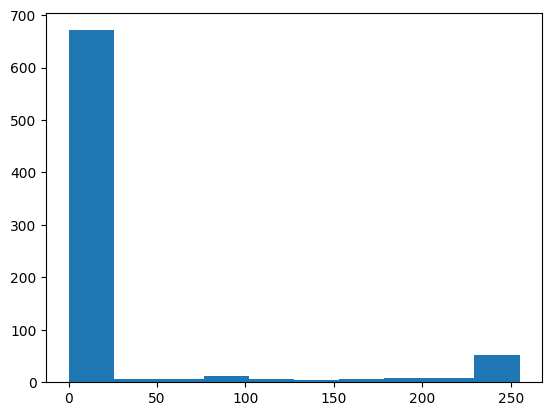

In [82]:
#tentativas de explorar os dados, apagar célula
r = np.random.randint(1, 70000)

plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

In [20]:
# Criando grupos de teste e treinamento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

## Questão 2
*As classes que vamos usar para fazer o nosso procedimento são as GaussianNB e BernoulliNB, localizadas dentro do módulo naive_bayes. A documentação do scikit-learn é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao GaussianNB (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) e ao BernoulliNB (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html), e as página direcionadas através do link "User Guide", onde encontram-se as formulações matemática por trás dos método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos fit, predict e predict_proba fazem.*



### BernoulliNB  

Observando os atributos da classe, percebe-se que os valores a serem processados pelo objeto precisam ser binários, assumindo valores 0 ou 1. Existe um parâmetro de inicialização para binarizar os valores passados a partir de um limiar chamado `binarize`.  
Eu fui ansioso para poder saber mais de como que *efetivamente* e finalmente poderiamos estimar $\mathbb{P}(X_i | y)$, mas o site não é direto assim.  
Ele define esta probabilidade como  
$P(x_i \mid y) = P(x_i = 1 \mid y) x_i + (1 - P(x_i = 1 \mid y)) (1 - x_i)$.  
De modo que ainda dependemos de  
$\mathbb{P}(X_i = 1 | y)$.  
E podemos ver na documentação que o log deste valor é calculado a partir da presença relativa de $Xb_i = 1$ na amostragem binarizada.  
- `feature_log_prob_ : ndarray of shape (n_classes, n_features)`:  
>Empirical log probability of features given a class, $\mathbb{P}(X_i = 1 | y)$.


  

### GaussianNB

Para estimar $P(x_i \mid y)$, de acordo com a documentação, se considerarmos a distribuição dos valores de $\mathbf{X_i}$ como uma distribuição normal $\text{N}(\mu_{dj}, \sigma_{dj}^2)$  
teremos o valor a ser determinado $ \LARGE P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$, ( f.d.p de uma variável normal)  
  
Onde os valores da média e variância são determinados por máxima verossimilhança.

### Métodos
Os métodos `fit`, `predict`, e `predict_proba` são comuns às classes. Até porque elas possuem atributos que são comuns entre si.
Embora precisem estimar atributos diferentes para cada uma.  
Estas diferenças serão listadas abaixo:  
#### `fit`
Estima vários parâmetros necessários para a computação das probabilidades associadas aos atributos de $\mathbb{X}$.  
Alguns **atributos em comum** estimados no método `fit` para os dois classificadores em questão são:  

- `class_count_ : ndarray of shape (n_classes,)`
    - Número de amostras para cada classificação dada
- **Probabilidade a priori da ocorrência das classes**
    - Este atributo de classe está em log para o classificador de Bernoulli, e entre 0 e 1 para o Gaussiano.  

Para o **classificador de Bernoulli**, o fit estima também:  

- Número de ocorrẽncias de $X_i=1$ para cada classificação, ou seja, probabilidade de "ocorrência" do pixel por dígito.  
- E $$P(X_i = 1 | y)$$

  
Para o **classificador Gaussiano** o fit estima também:

- Variância de cada atributo por classe
- Média de cada atributo por classe (pixel por dígito, para o problema dado)
- Epsilon
    - Descrição: valor aditivo à variância 

#### `predict`
Realiza uma classificação simples nos valores de $\mathbb{X}$ dados.  

#### `predict_proba`
Retorna uma matriz contendo as probabilidades de $\mathbb{X}$ pertencer a cada uma das classes $Y$.

In [21]:
#CHECANDO ATRIBUTOS CALCULADOS PELO MÉTODO FIT:
# Para Bernoulli
clfb = BernoulliNB(force_alpha=True)
#atributos do classificador antes do fit
antes_fit = dir(clfb)

clfb.fit(X_train,y_train)
#atributos do classificador depois do fit
depois_fit = dir(clfb)
attrfitb = set(depois_fit) - set(antes_fit)
print("Atributos que .fit() estima para classificador de Bernoulli:\n\t",attrfitb)


# Para classificador Gaussiano
clfg = GaussianNB()
af= dir(clfg)
clfg.fit(X_train,y_train)
df = dir(clfg)
attrfitg = set(df) - set(af)
print("\nAtributos que .fit() estima para classificador Gaussiano :\n\t",attrfitg)



Atributos que .fit() estima para classificador de Bernoulli:
	 {'feature_log_prob_', 'class_count_', 'feature_count_', 'n_features_in_', 'classes_', 'class_log_prior_', 'feature_names_in_'}

Atributos que .fit() estima para classificador Gaussiano :
	 {'class_count_', 'class_prior_', 'var_', 'n_features_in_', 'classes_', 'theta_', 'epsilon_', 'feature_names_in_'}


## **QUESTÃO 3:** 

*Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` e o `BernoulliNB` para treinar os modelos de Bayes ingênuo gaussiano e Bernoulli nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.*

		CLASSIFICADOR INGÊNUO POR BERNOULLI:



 Threshold para binarização: X_i > 125
        
Indice de acerto total: 0.8341

		CLASSIFICADOR INGÊNUO GAUSSIANO:
Indice de acerto total: 0.5621




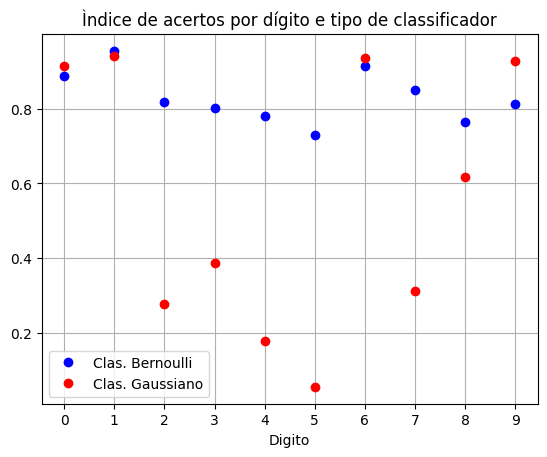

In [22]:
print("\t\tCLASSIFICADOR INGÊNUO POR BERNOULLI:")

#Calculando indice de acertos por digitos 

def acertos_por_digito(predicoes,y_test):
    #contando ocorrencia de digitos
    y_class_occur = {}
    for i in range(10):
        y_class_occur.update({str(i):0})
    
    for i in y_test.values:
        for j in range(10):
            if(i ==str(j)):
                y_class_occur.update({i:y_class_occur[i]+1})
    #contando acertos por digitos
    acertos_digitos = {}
    for i in range(10):
        acertos_digitos.update({i:0})
        
    for i in range(predicoes.shape[0]):
        digito = predicoes[i]
        if(digito==y_test.values[i]):
            acertos_digitos.update( {int(digito):acertos_digitos[int(digito)]+1 } )
    for i in range(10):
        acertos_digitos.update( {i:acertos_digitos[i]/y_class_occur[str(i)]} )
    
    return acertos_digitos
    
## PARA BERNOULLI:
#após algumas tentativas, percebi que o melhor threshold para binarização era aproximadamente 125
clfb.binarize = 125
clfb.fit(X_train,y_train)

## Contando indice de acerto para y_test:
predicoes = clfb.predict(X_test)
acertos = 0
for i in range(predicoes.shape[0]):
    if(predicoes[i]==y_test.values[i]):
        acertos+=1
ind_b = acertos/predicoes.shape[0]
print('''\n Threshold para binarização: X_i > {}
        \nIndice de acerto total: {}'''.format(clfb.binarize,ind_b))

#Plotando acertos por digito
act_digb= acertos_por_digito(predicoes,y_test)



# Para classificador gaussiano

print("\n\t\tCLASSIFICADOR INGÊNUO GAUSSIANO:")

clfg.fit(X_train/255,y_train)
predicoes = clfg.predict(X_test/255)

acertos = 0
for i in range(predicoes.shape[0]):
    if(predicoes[i]==y_test.values[i]):
        acertos+=1
ind_g = acertos/predicoes.shape[0]
print("Indice de acerto total: {}\n\n".format(ind_g))
act_digg = acertos_por_digito(predicoes,y_test)


# plotango grafico de acertos por digito
plt.plot(act_digb.values(),'bo',label="Clas. Bernoulli")
plt.plot(act_digg.values(),'ro',label="Clas. Gaussiano")
plt.title("Ìndice de acertos por dígito e tipo de classificador")
plt.legend(fontsize=10)
plt.xticks(range(10))
plt.grid()
plt.xlabel("Digito")
plt.show()

#IDEIA DE GRAFICO UTILIZANDO predict_proba: valor médio da probabilidade ~g(x) para cada digito e tipo de classificacao



## **QUESTÃO 4:** 
*Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? E para o classificador de Bayes ingênuo Bernoulli? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.*

Algumas respostas já estão na questão 2, por exemplo. Onde vemos que, de modo comum às duas classificações, precisamos contabilizar a probabilidade a priori de ocorrência das classes, por exemplo. Outros parâmetros são específicos para cada classificação.

### Parâmetros para estimador Gaussiano:

Para um classificador Gaussiano, precisamos calcular a **média** e a **variância** para cada atributo $X_i$ condicionado a uma classe $Y_i$.

Como temos 784 atributos/pixels em uma observação, isto nos dá $2\cdot784=1568 $  atributos para cada classificação/dígito,  
totalizando a computação de $10\cdot1568=15680 $ parâmetros, que são a média e variância de 60000 observações!  
Após achados estes parâmetros, para classificar uma observação precisamos computar a f.d.p $\varphi(x_j | Y = d)$ para cada $j$ e $d$, ou seja, mais **7840** parâmetros!

### Parâmetros para estimador de Bernoulli

Precisamos estimar a probabilidade $\mathbb{P}(X_i = 1 | y)$ para cada pixel/atributo $i$ e classe $Y$. isto é, 7840 parâmetros!

### Algumas conclusões

O classificador **Gaussiano** precisa estimar muito mais parâmetros para realizar classificações.... Para cada classificação e atributo ele precisa calcular médias e variâncias, para então calcular $\varphi$ em cima delas...  
Considerando que nem todas as distribuições de valores dos atributos por classe são normais, isto é como...  digamos, "dar mais chances para um computador errar". 

## **QUESTÃO 5:** 
*Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.*

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS: Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.*



### Resposta:

Pelo que entendi, matrizes de confusão consistem em tabelar o número de ocorrências de cada "chute classificatório" condicionado à cada classificação correta. Poderíamos, por exemplo, ver quantas vezes o classificador considerou  um caractere como "1" quando a sua classificação real era "7".

Quanto às métricas obtidas a partir de uma matriz de classificação, parece que elas são mais bem definidas para problemas classificatórios binários, visto que todas as medidas relacionadas como acurácia, precisão ( entre outras ) são definidas em termos de **Verdadeiros/Falsos Positivos** ou **Verdadeiros/Falsos Negativos**

Logo o método `score` para nosso problema, que é multi-classe, traz uma média da acurácia para cada classe individual! É possível calcularmos isto pois temos como criarmos matrizes de confusão binárias *para cada classe*, e aí então obtemos as média da acurácia para cada classe.  
Este indicador pareceu bem próximo ao que eu ingenuamente chamei de "índice de acerto" para cada classificação na questão 3.


#### Porque teríamos que aferir a qualidade a partir de um conjunto teste, e não de treinamento?

Vejamos como nosso classificador se sai ao classificar o conjunto de treinamento, em comparação com o de teste(código na célula abaixo).  
Com o resultado, vemos que o score é ligeiramente melhor para a predição de conjuntos de treinamento.

In [23]:
# Aferindo qualidade de uma classificao do conjunto de treinamento:
print("Score para Bernoulli, com conjunto de treinamento: ",clfb.score(X_train,y_train))
print("Score para Class. Gaussiano, com conjunto de treinamento: ",clfg.score(X_train,y_train))


print("\n\nScore para Bernoulli, com conjunto de teste: ",clfb.score(X_test,y_test))
print("Score para Class. Gaussiano, com conjunto de teste: ",clfg.score(X_test,y_test))


Score para Bernoulli, com conjunto de treinamento:  0.8366666666666667
Score para Class. Gaussiano, com conjunto de treinamento:  0.6469666666666667


Score para Bernoulli, com conjunto de teste:  0.8341
Score para Class. Gaussiano, com conjunto de teste:  0.6456


## **QUESTÃO 6:**   
*Use o código dado abaixo para exibir as matrizes de confusão, bem como uma representação gráfica mais amigável delas. Analise os erros cometidos pelos classificadores e tente justificá-los, com base nas hipóteses dos classificadores e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional dos classificadores! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.*

### Resposta:

Conforme vimos na questão 3 e pudemos confirmar com os `scores` na questão anterior, o classificador de Bernoulli se sai melhor que o Gaussiano.  

Talvez, quando tentamos atribuir um modelo de distribuição para $X_i$(um pixel) condicionado em $Y$ (um dígito) faça mais sentido pensar neles como ensaios independentes que podem ou não "ocorrer", ou estar "pintado", e por isto o modelo de Bernoulli se adequa mais.  
Quanto à classificação Gaussiana, quando vemos histogramas de distribuição dos valores de $X_i$ condicionado em um dígito $Y$, o histograma claramente não parece uma distribuição normal, em forma de 'sino', (podemos ver no exemplo da célula abaixo).  
Talvez por isto ela não tenha tido um score tão bom quanto o classificador de Bernoulli, embora tenha se saído melhor que um classificador aleatório!  
O melhor desempenho do classificador de Bernoulli é visível na sua Matriz de confusão, com a diagonal bem demarcada (indicando acertos ).

Analisando frequencia de valores para pixel 623 referentes ao dígito 8

	 6825 imagens analisadas


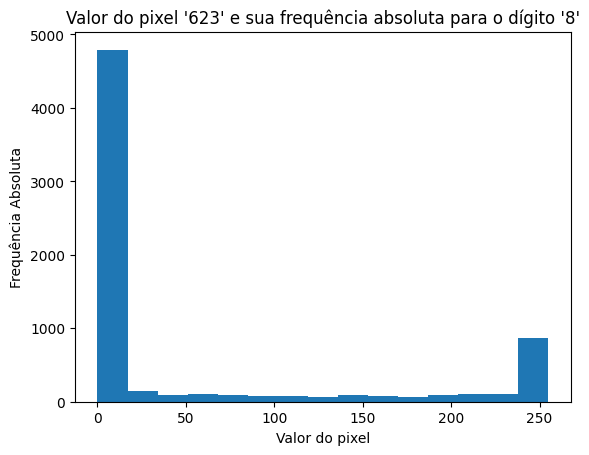

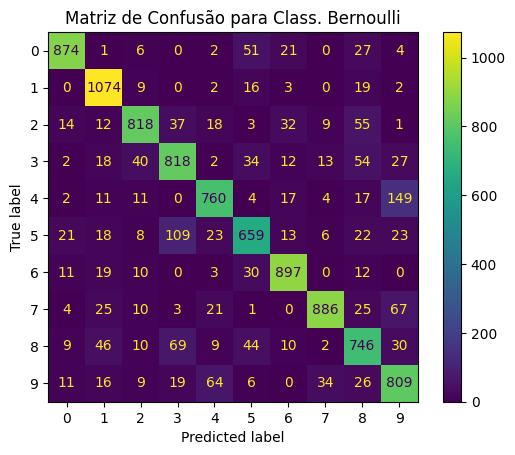

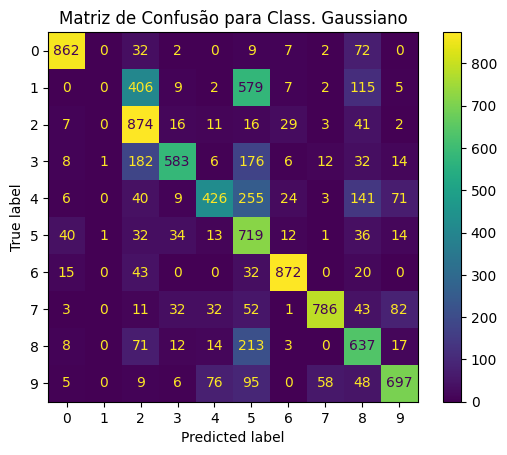

In [81]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

#calcula matriz de classificao binaria para um classificacao
# baseado em https://www.youtube.com/watch?v=gkNccYwtAbU

def graf_cm(cm, lb, s1):
    disp = ConfusionMatrixDisplay(cm, display_labels = lb)
    disp.plot()
    plt.title("Matriz de Confusão para Class. " + s1)
    plt.show()
    
labels = y.cat.categories
cm_b = confusion_matrix(y_test,clfb.predict(X_test),labels=labels)
cm_g = confusion_matrix(y_test,clfg.predict(X_test),labels=labels)

# print(sum(act_digb.values())/10)

# calcular a distribuicao de frequencia de valores de um píxel aleatorio "X_i" condicionado por um digito d

i = np.random.randint(0,783)
digito = str(np.random.randint(0,9))
frequencia = [0 for i in range(256)]
valores = []
print("Analisando frequencia de valores para pixel {} referentes ao dígito ".format(i) + digito + "\n")
c=0
for j in range(len(X.values)):
    if(y[j]==digito):
        c+=1
        frequencia[X.values[j][i]]+=1
        valores.append(X.values[j][i])
        
print("\t {} imagens analisadas".format(c))
# print(frequencia)
# print("total = {}".format(sum(frequencia)))

#plotando (valor do pixel x frequencia) por digito

# plt.plot([i for i in range(256)],frequencia, 'k')
plt.hist(valores,15)
plt.title("Valor do pixel \'{}\' e sua frequência absoluta para o dígito \'{}\'".format(i,digito))
plt.xlabel("Valor do pixel")
plt.ylabel("Frequência Absoluta")

#mostrando matrizes de confusao
graf_cm(cm_b,labels,"Bernoulli")
graf_cm(cm_g,labels,"Gaussiano")




In [75]:
def calc_binm(cm,digit):
    tp = cm[digit,digit]
    #calc de falsos negativos e positivos, e verdadeiros negativos:
    fn = 0
    fp = 0
    tn = 0
    for i in range(10):
        if i!=digit:
            fn+=cm[digit,i]
            fp+=cm[i,digit]
        for j in range(10):
            if i!=digit and j!=digit:
                tn+=cm[i,j]
    return np.array([[tp, fp],[fn,tn]])
    #calc falso positivo

#calcula acuracia dado matriz de confusao binaria
# sendo acuracia = tp + tn / total
def accbinm(bcm):
    return (bcm[0,0]+bcm[1,1])/bcm.sum()
    


